In [22]:
tobacco = 0.06427091078211888 #Tabaco
gini = 0.153 #Gini
hdi = 0.77 #HDI

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm


# Análise sobre a Expectativa em suas principais características

## Tratando Dados

Importando e Tratando o DataFrame sobre Expectativa de vida, que será o foco do trabalho final.

In [23]:
df_expectativa_vida = pd.read_csv('./dataset/expectativa_vida.csv', sep=',')

df_expectativa_vida  = df_expectativa_vida[['Indicator','ParentLocation','Country', 'Period', 'Dim1', 'Value']]

# Pivotando o dataframe para transformar a coluna 'Period' em colunas separadas para os anos desejados
df_expectativa_vida = df_expectativa_vida.pivot_table(index=['Indicator', 'ParentLocation', 'Country', 'Dim1'], columns='Period', values='Value').reset_index()

df_expectativa_vida = df_expectativa_vida.rename(columns={
    2000: '2000_expectativa',
    2010: '2010_expectativa',
    2015: '2015_expectativa',
    2019: '2019_expectativa'
})

# Selecionando apenas as colunas desejadas
df_expectativa_vida = df_expectativa_vida[['Indicator', 'ParentLocation', 'Country', 'Dim1', '2000_expectativa', '2010_expectativa', '2015_expectativa', '2019_expectativa']]
df_expectativa_vida.head()




Period,Indicator,ParentLocation,Country,Dim1,2000_expectativa,2010_expectativa,2015_expectativa,2019_expectativa
0,Life expectancy at age 60 (years),Africa,Algeria,Both sexes,19.81,21.37,21.81,22.04
1,Life expectancy at age 60 (years),Africa,Algeria,Female,20.25,21.85,22.33,22.62
2,Life expectancy at age 60 (years),Africa,Algeria,Male,19.36,20.89,21.33,21.53
3,Life expectancy at age 60 (years),Africa,Angola,Both sexes,14.42,15.97,16.71,16.98
4,Life expectancy at age 60 (years),Africa,Angola,Female,16.01,17.54,18.42,18.55


In [24]:
# Separando os dados com base no indicador - Expectativa de vida ao nascer
df_expectativa_ao_nascer = df_expectativa_vida[df_expectativa_vida['Indicator'] == 'Life expectancy at birth (years)']
df_expectativa_ao_nascer= df_expectativa_ao_nascer[df_expectativa_ao_nascer['Dim1'] == 'Both sexes']

df_expectativa_ao_nascer.head()


Period,Indicator,ParentLocation,Country,Dim1,2000_expectativa,2010_expectativa,2015_expectativa,2019_expectativa
549,Life expectancy at birth (years),Africa,Algeria,Both sexes,72.21,75.85,76.54,77.13
552,Life expectancy at birth (years),Africa,Angola,Both sexes,49.30,58.07,61.72,63.06
555,Life expectancy at birth (years),Africa,Benin,Both sexes,56.59,60.47,61.96,63.43
558,Life expectancy at birth (years),Africa,Botswana,Both sexes,45.59,58.14,60.93,62.25
561,Life expectancy at birth (years),Africa,Burkina Faso,Both sexes,51.64,58.59,60.92,62.70


In [25]:
# Separando os dados com base no indicador - Expectativa de vida aos 60 anos
df_expectativa_aos_60 = df_expectativa_vida[df_expectativa_vida['Indicator'] == 'Life expectancy at age 60 (years)']
df_expectativa_aos_60 = df_expectativa_aos_60[df_expectativa_aos_60['Dim1'] == 'Both sexes']
df_expectativa_aos_60.head()


Period,Indicator,ParentLocation,Country,Dim1,2000_expectativa,2010_expectativa,2015_expectativa,2019_expectativa
0,Life expectancy at age 60 (years),Africa,Algeria,Both sexes,19.81,21.37,21.81,22.04
3,Life expectancy at age 60 (years),Africa,Angola,Both sexes,14.42,15.97,16.71,16.98
6,Life expectancy at age 60 (years),Africa,Benin,Both sexes,16.08,16.69,17.01,17.40
9,Life expectancy at age 60 (years),Africa,Botswana,Both sexes,12.92,15.26,15.89,16.25
12,Life expectancy at age 60 (years),Africa,Burkina Faso,Both sexes,15.52,16.17,16.44,16.82


# Análise Inicial sobre a Expectativa de Vida

c:\Users\henri\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\henri\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\henri\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\henri\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

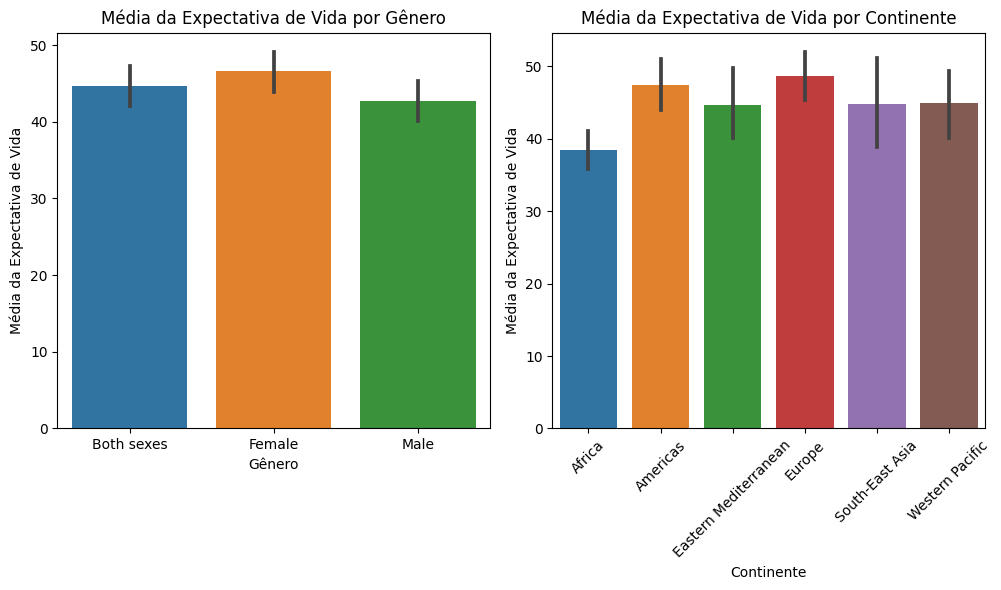

In [26]:

mean_expectativa_vida = df_expectativa_vida[['2000_expectativa', '2010_expectativa', '2015_expectativa', '2019_expectativa']].mean(axis=1)

# Adicione a média ao dataframe
df_expectativa_vida['mean_expectativa_vida'] = mean_expectativa_vida

plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
sns.barplot(x='Dim1', y='mean_expectativa_vida', data=df_expectativa_vida)
plt.title('Média da Expectativa de Vida por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Média da Expectativa de Vida')
plt.tight_layout()

plt.subplot(1, 3, 2)
sns.barplot(x='ParentLocation', y='mean_expectativa_vida', data=df_expectativa_vida)
plt.title('Média da Expectativa de Vida por Continente')
plt.xlabel('Continente')
plt.ylabel('Média da Expectativa de Vida')
plt.xticks(rotation=45)
plt.tight_layout()


plt.show()



## Quais continentes do mundo têm visto as maiores melhorias na expectativa de vida ao longo do tempo? 

c:\Users\henri\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\henri\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\henri\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\henri\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

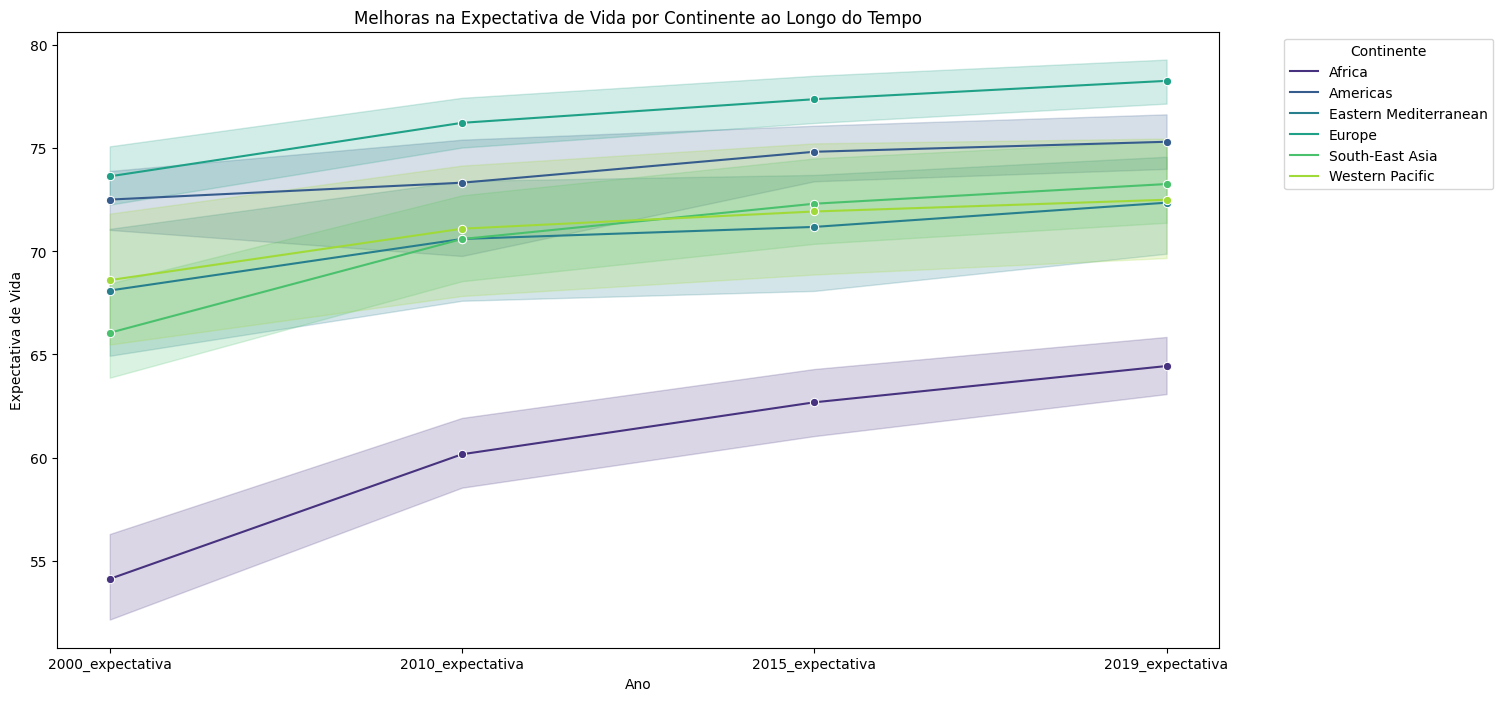

In [46]:

# Filtra o DataFrame para incluir apenas as colunas necessárias
df_melhoras_expectativa = df_expectativa_ao_nascer[['ParentLocation', '2000_expectativa', '2010_expectativa', '2015_expectativa', '2019_expectativa']]

# Melt para transformar o DataFrame de formato amplo para longo
df_melhoras_expectativa_melted = df_melhoras_expectativa.melt(id_vars='ParentLocation', var_name='Ano', value_name='Expectativa de Vida')

# Plotando o gráfico
plt.figure(figsize=(15, 8))
sns.lineplot(data=df_melhoras_expectativa_melted, x='Ano', y='Expectativa de Vida', hue='ParentLocation', marker='o', palette='viridis')
plt.title('Melhoras na Expectativa de Vida por Continente ao Longo do Tempo')
plt.xlabel('Ano')
plt.ylabel('Expectativa de Vida')
plt.legend(title='Continente', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Period ParentLocation  2000_expectativa  2010_expectativa  2015_expectativa  \
630            Africa             44.73             56.80             63.04   
564            Africa             43.78             58.60             62.05   
654            Africa             47.51             64.44             67.69   
684            Africa             44.46             56.67             60.50   
678            Africa             48.76             59.67             64.47   

Period  2019_expectativa  razao_2019_2000  
630                65.62         1.467024  
564                63.84         1.458200  
654                69.10         1.454431  
684                62.45         1.404633  
678                66.69         1.367719  


c:\Users\henri\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\henri\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\henri\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


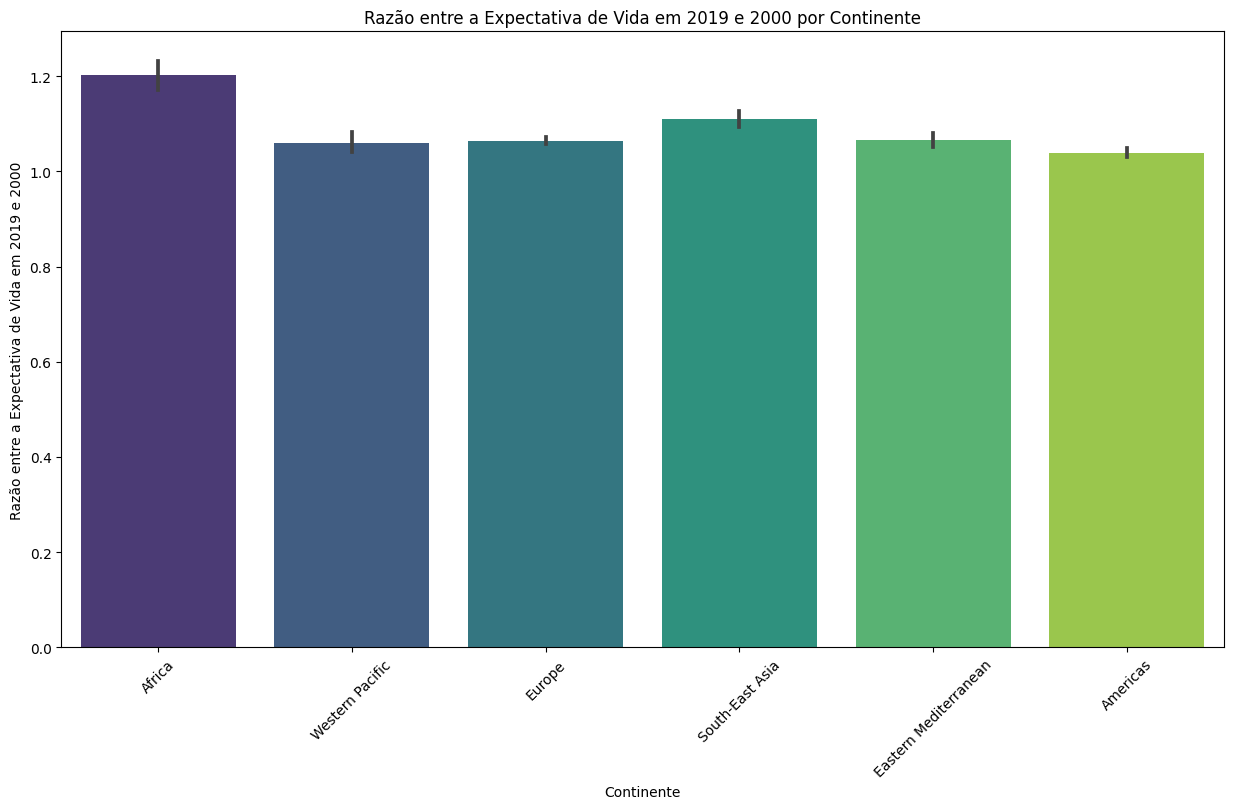

In [49]:
# Compute the reazão entre 2019 e 2000

df_melhoras_expectativa['razao_2019_2000'] = df_melhoras_expectativa['2019_expectativa'] / df_melhoras_expectativa['2000_expectativa']

# Ordena o DataFrame pela razão
df_melhoras_expectativa = df_melhoras_expectativa.sort_values(by='razao_2019_2000', ascending=False)

print(df_melhoras_expectativa.head())

# Plotando o gráfico
plt.figure(figsize=(15, 8))
sns.barplot(data=df_melhoras_expectativa, x='ParentLocation', y='razao_2019_2000', palette='viridis')
plt.title('Razão entre a Expectativa de Vida em 2019 e 2000 por Continente')
plt.xlabel('Continente')
plt.ylabel('Razão entre a Expectativa de Vida em 2019 e 2000')
plt.xticks(rotation=45)
plt.show()


## Qual a predição da expectativa de vida para as próximas décadas em cada país?
